<a href="https://colab.research.google.com/github/Alvaro-Garcia-Parra/AA_GRUPO3/blob/main/LAB03_Pr1Olimpiadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías y funciones a utilizar

In [ ]:
import mlxtend
from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend import frequent_patterns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Objetivo
Se quiere crear un modelo que permita saber si un atleta español va a tener medalla de oro, plata o bronce
en los juegos olímpicos de Tokio que se celebrarán en 2020. Para ello, tendremos en cuenta el lugar que
ocupan en un espacio n-dimensional donde n es el número de características de cada atleta.

Para ello usaremos el dataset “Juegos olímpicos” que se encuentra en Moodle. Elige el clasificador que más se
adapte de entre los vistos en clase y usa scikit-learn junto con las librerías que necesites para resolver las
siguientes cuestiones.

1) Haz todo el preprocesamiento para crear un set de entrenamiento y otro de validación qué permita
clasificar atletas qué tengan sólo las características necesarias. Aparte de los totalmente necesarios,
usaremos como atributos: Sexo, Edad, Altura y Peso. Explica qué has hecho y porqué. (0,5 puntos)

2) Prueba con distintas configuraciones de las dos métricas principales. La primera métrica corresponde
al número de individuos que usarás para clasificar una nueva instancia y la segunda cómo vas a medir
la cercanía de esa nueva instancia con el resto. (1 punto)

3) Elige la mejor configuración entre las anteriores. Para ello dibuja una tabla ver cómo evoluciona la
clasificación. Dibuja los resultados que se obtienen con ambas configuraciones elegidas cómo las
mejores. (1 punto)

4) Utiliza el clasificador para saber que medalla es más probable que ganen Bruno Hortelano (Athletycs),
Carolina Marín (Badminton) o la selección femenina de baloncesto (Basketball). (0,5 puntos

## Desarrollo
### Lectura y preprocesamiento de los datos

In [ ]:
# Lectura de la base de datos
filename = 'olimpiadas.csv'
data = pd.read_csv(filename, sep = ',')

# Revisión de los tipos de datos
print(data.dtypes)
data

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


Creamos un nuevo dataset con las variables necesarias como nos pide en el primer apartado. A parte de los necesarios ya indicados, añadimos 'Games' (año y estación en la que participa en las olimpiadas) y 'Sport' (deporte en el que compite). Hemos añadido estas dos variables ya que nos parecen muy relevantes a la hora de predecir si ganará medalla o no.
 - Sport: Esta variable ha sido elegida porque no es "justo" comparar a dos participantes en los que compiten en distintos deportes.
 - Games: Al igual que la anterior variable, por la misma razón, no podemos comparar dos participantes que han competido en distinta época del año o incluso en distinto año ya que vemos mucha diferencia y mucha mejoría en los participantes a lo largo de los años.

In [ ]:
# Creamos el nuevo dataset con las variables necesarias
data = data[['Sex','Age','Height','Weight','Games','Sport','Medal']]
data.drop_duplicates()
data

,Sex,Age,Height,Weight,Games,Sport,Medal
0,M,24.0,180.0,80.0,1992 Summer,Basketball,NaN
1,M,23.0,170.0,60.0,2012 Summer,Judo,NaN
2,M,24.0,NaN,NaN,1920 Summer,Football,NaN
3,M,34.0,NaN,NaN,1900 Summer,Tug-Of-War,Gold
4,F,21.0,185.0,82.0,1988 Winter,Speed Skating,NaN
...,...,...,...,...,...,...,...
271111,M,29.0,179.0,89.0,1976 Winter,Luge,NaN
271112,M,27.0,176.0,59.0,2014 Winter,Ski Jumping,NaN
271113,M,27.0,176.0,59.0,2014 Winter,Ski Jumping,NaN
271114,M,30.0,185.0,96.0,1998 Winter,Bobsleigh,NaN


Comprobamos los valores vacíos que hay en la base de datos.
Debido a que esta contiene muchos datos, hemos tomado la decisión de que lo mejor en este caso es eliminar las filas las cuales contienen algún valor nulo. Como podemos observar a continuación, los únicos atributos que contienen NaN son 'Age', 'Weight', 'Height' y 'Medal'.

In [ ]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Sex     271116 non-null  object 
 1   Age     261642 non-null  float64
 2   Height  210945 non-null  float64
 3   Weight  208241 non-null  float64
 4   Games   271116 non-null  object 
 5   Sport   271116 non-null  object 
 6   Medal   39783 non-null   object 
dtypes: float64(3), object(4)
memory usage: 14.5+ MB


<ipython-input-32-c1a516913eb1>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  data.info(verbose=True, null_counts=True)


Por lo tanto, como ya hemos comentado, eliminamos todas las filas en las cuales contienen algún valor NaN en alguno de los atributos, sin embargo; en el atributo 'Medal' cambiamos el valor a 'None', ya que interpretamos que si contienen un valor nulo quiere decir que no han ganado ninguna medalla cuando participaron.

In [ ]:
data = data.drop(data[np.isnan(data['Age'])].index)
data = data.drop(data[np.isnan(data['Weight'])].index)
data = data.drop(data[np.isnan(data['Height'])].index)
data['Medal'].fillna('None', inplace = True)

A continuación, vemos los outliers de nuestras variables numéricas (Age, Weight, Height). De tal forma que si encontramos algún valor anómalo podríamos cambiar dicho valor o incluso eliminarlos de la base de datos.
Pero como podremos ver, no hay ningún valor que sea extraño. Si es verdad que hay algunos casos extremos, como por ejemplo, un participante que pesa 25 kg. Pero, a pesar de esto, hemos comprobado en google estos casos extremos de los que hablamos y todos son casos reales, así que los consideramos todos correctos y decidimos dejar la base de datos tal y como estaba.

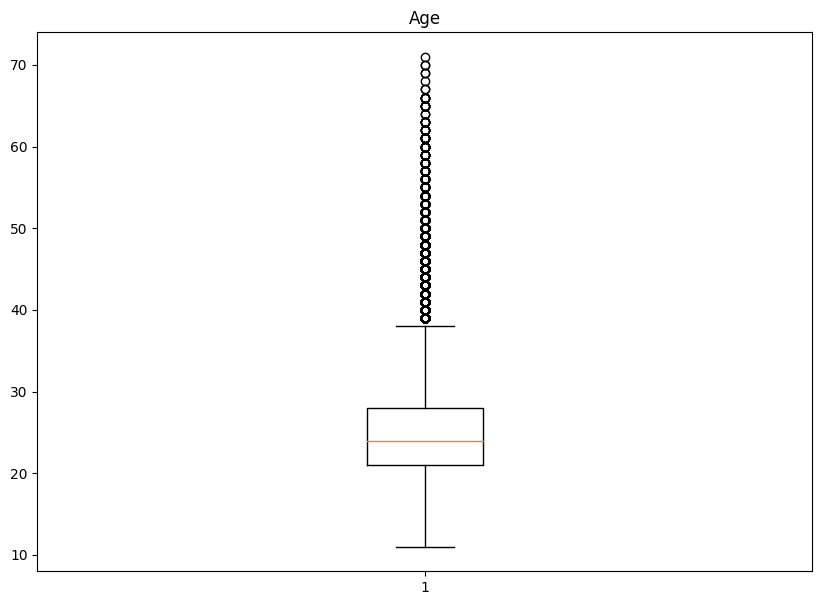

In [ ]:
# Vemos los outliers

fig = plt.figure(figsize =(10, 7))

# Crear gráfico
ax = fig.add_subplot(111)
ax.boxplot(data["Age"])
ax.set_title('Age')

# Dibujar gráfico
plt.show()

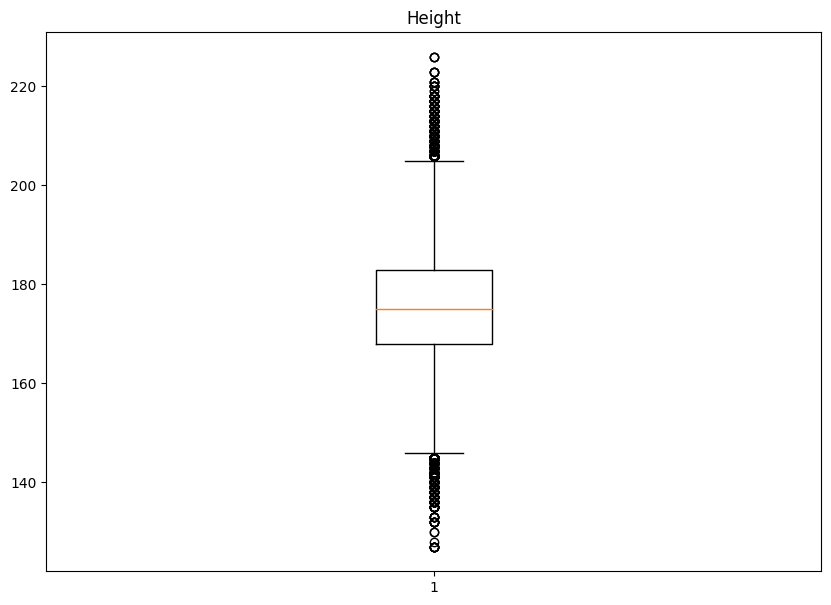

In [ ]:
# Vemos los outliers

fig = plt.figure(figsize =(10, 7))

# Crear gráfico
ax = fig.add_subplot(111)
ax.boxplot(data["Height"])
ax.set_title('Height')

# Dibujar gráfico
plt.show()

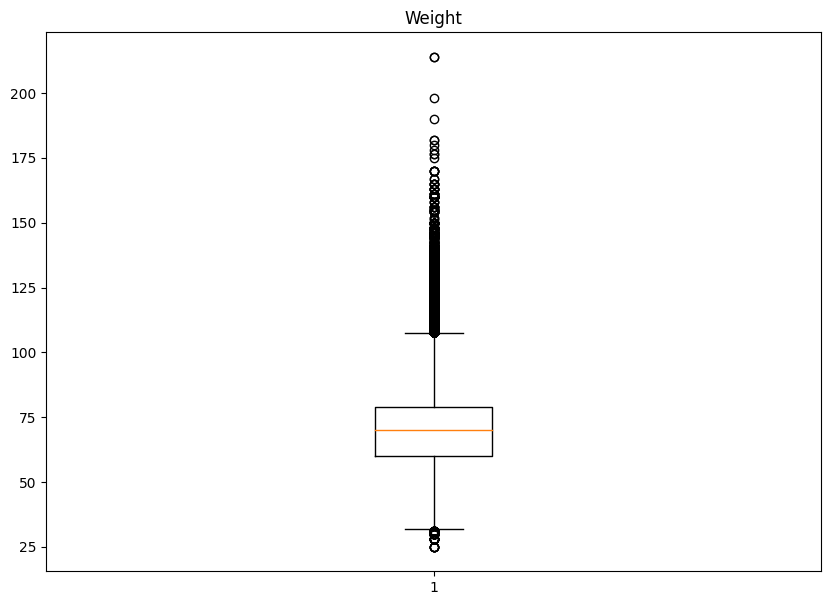

In [ ]:
# Vemos los outliers

fig = plt.figure(figsize =(10, 7))

# Crear gráfico
ax = fig.add_subplot(111)
ax.boxplot(data["Weight"])
ax.set_title('Weight')

# Dibujar gráfico
plt.show()

Debido a que la base de datos sigue siendo demasiado grande a pesar de los participantes ya eliminados, nos vemos obligados a reducir considerablemente la base de datos ya que el tiempo de ejecución es muy alto.

Por eso tenemos la siguiente línea: data = data.sample(n = 10000). Donde reducimos la base de datos a 10.000 participantes totalmente aleatorio. El problema principal de realizar esto es que nos arriesgamos a que nuestro subconjunto de datos todas sus etiquetas sean del mismo tipo, 'None', y por tanto no se podrá crear un clasificador en condiciones.

Si queremos trabajar con toda la base de datos, lo único que hay que hacer es comentar la línea de código mencionada.

Una vez explicado esto, procedemos a separar la base de datos en lo que son los individuos (X) y sus etiquetas (y). Además de añadir a los dos participantes que queremos predecir/clasificar al final de la práctica. Más adelante explicaremos la razón por la cual añadimos a estos nuevos individuos juntos con el resto.

In [ ]:
# Antes de nada definimos lo que es la etiqueta (y) y nuestros individuos
data = data.sample(n = 10000)
X = data.drop(['Medal'], axis = 1)
y = data['Medal']

# Añadimos los individuos que queremos clasificar
bruno_hortelano = ['M',31,181,72,'2018 Winter','Athletics']
carolina_marin = ['F',29,172,65,'2020 Summer','Badminton']

# Convertir la lista en un dataframe con un solo renglón
bruno_hortelano = pd.DataFrame([bruno_hortelano], columns=X.columns)
carolina_marin = pd.DataFrame([carolina_marin], columns=X.columns)

# Añadimos los individuos
X = pd.concat([X,bruno_hortelano], ignore_index= True)
X = pd.concat([X,carolina_marin], ignore_index= True)

Como la base de datos contiene datos de tipo 'string' y vamos a usar el método Knn (K- Nearest Neighbour), tenemos que categorizar dichos datos. Para ello, la forma más simple, es pasarlos a One Hot Encoding con el método 'get_dummies'. Una vez hecho esto, somos capaces de comparar dos participantes y calcular sus distancias para poder obtener el clasificador.

Por eso añadimos los individuos a clasificar, ya que necesitabamos tenerlos categorizados. Como ya los tenemos los podemos sacar de la base datos y ya los utilizaremos al final de la práctica para predecir sus etiquetas.

In [ ]:
# Convertir los datos de tipo string a valores numéricos utilizando la codificación one-hot encoding
X = pd.get_dummies(X,columns=['Sex','Games','Sport'])
carolina_marin = X.iloc[[-1]].reset_index(drop = True)
bruno_hortelano = X.iloc[[-2]].reset_index(drop = True)

X = X.drop(X.index[[-2,-1]])

### Creación del clasificador con el método Knn
Antes de nada, vamos a elegir cuál es el número de vecinos (k) y ka distancia (metric) más óptimo. Para ello, usamos cross-validation para elegir el mejor k. Vamos probando con las distintas K's y distintas distancias y nos quedaremos con la que tenga mayor precisión, en caso de empate de precisión nos quedamos con el que tenga mayor k. Y en caso de empate de número de vecinos, da igual que métrica usemos para medir la distancia.

Utilizamos un número de vecinos impar para evitar los empates a la hora de clasificar un participante. Y comprobaremos las siguientes métricas: distancia euclidea, manhattan, hamming y minkowski.



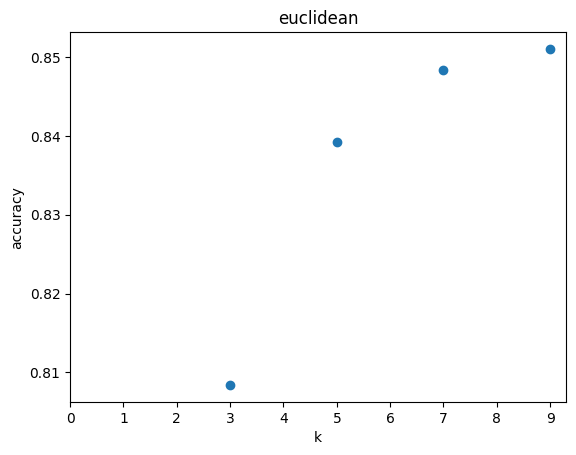

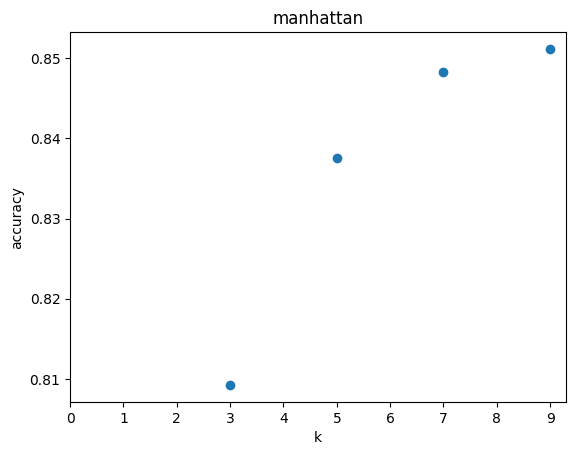

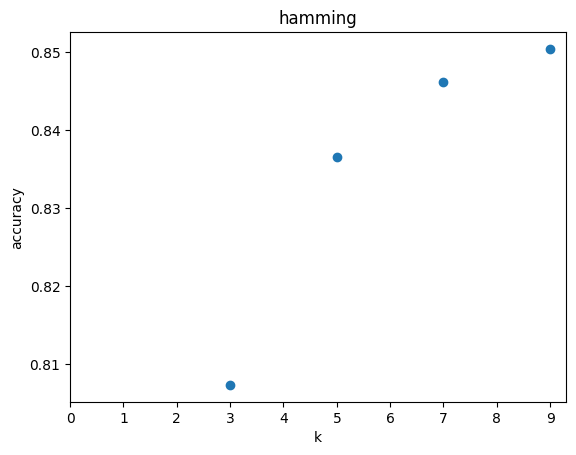

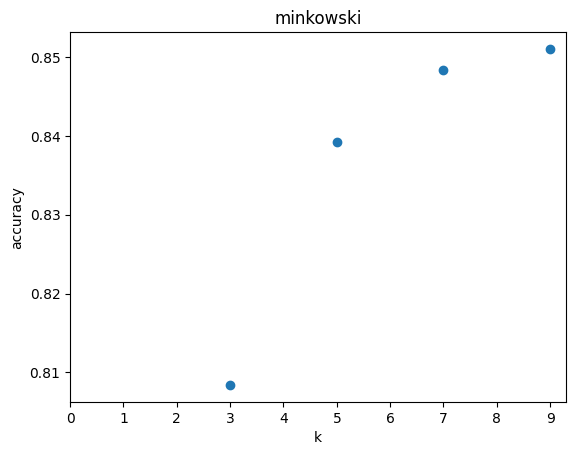

In [ ]:
k_range = [3,5,7,9]
distancias = ['euclidean', 'manhattan', 'hamming', 'minkowski']

# Creación de la tabla
tabla = PrettyTable()
tabla.field_names = ["K","Distance","Accuracy"]

# Guardamos en una variable la distancia y el nímero de vecinos más óptimos
best_score = 0
best_metric = ''
best_k = 0

for d in distancias:
  k_scores = []
  index = 0
  for k in k_range:
      knn = KNeighborsClassifier(n_neighbors = k, metric = d)
      scores = cross_val_score(knn, X, y, cv=4, scoring='accuracy')
      k_scores.append(scores.mean())

      if scores.mean() >= best_score:
        best_score = scores.mean()
        best_metric = d
        best_k = k


      tabla.add_row([k,d,round(k_scores[index],4)])
      index = index + 1

  plt.figure()
  plt.title(label = d)
  plt.xlabel('k')
  plt.ylabel('accuracy')
  plt.scatter(k_range, k_scores)
  plt.xticks(range(0,10))

Para comprobar cual de ellos es mejor, hemos graficado la precisión de cada métrica en función de la k. Pero no es bastante claro ya que más o menos todas siguen la misma línea. Por ello, vamos a dibujar una tabla con los valores exactos y ahí podemos compararlos más fácilmente.

In [ ]:
print(tabla)
print("\nObservando la tabla podemos concluir lo siguiente:\n")
print(f"Utilizaremos la distancia {best_metric} con un número de vecinos (k = {best_k}), cuya precisión máxima es de {best_score}")

+---+-----------+----------+
| K |  Distance | Accuracy |
+---+-----------+----------+
| 3 | euclidean |  0.8084  |
| 5 | euclidean |  0.8392  |
| 7 | euclidean |  0.8483  |
| 9 | euclidean |  0.851   |
| 3 | manhattan |  0.8092  |
| 5 | manhattan |  0.8375  |
| 7 | manhattan |  0.8483  |
| 9 | manhattan |  0.8512  |
| 3 |  hamming  |  0.8074  |
| 5 |  hamming  |  0.8365  |
| 7 |  hamming  |  0.8462  |
| 9 |  hamming  |  0.8504  |
| 3 | minkowski |  0.8084  |
| 5 | minkowski |  0.8392  |
| 7 | minkowski |  0.8483  |
| 9 | minkowski |  0.851   |
+---+-----------+----------+

Observando la tabla podemos concluir lo siguiente:

Utilizaremos la distancia manhattan con un número de vecinos (k = 9), cuya precisión máxima es de 0.85118


Vemos la tabla con todos los valores de k, las metricas y la precisión correspondiente a estos. El que mayor precisión tiene es la distancia manhattan con un número de vecinos k = 9.

Así es lo que vamos a utilizar para crear nuestro clasificador. Para poder realizar esto primero debemos de separar nuestros datos en entrenamiento (75 % de los datos) y test (25 % de los datos).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Creamos el clasificador
clasificador = KNeighborsClassifier(n_neighbors = best_k, metric = best_metric)
clasificador.fit(X_train, y_train)

[[    2     3   634     0]
 [    4     0   640     0]
 [   13    11 10605     4]
 [    1     2   581     0]]
              precision    recall  f1-score   support

      Bronze       0.10      0.00      0.01       639
        Gold       0.00      0.00      0.00       644
        None       0.85      1.00      0.92     10633
      Silver       0.00      0.00      0.00       584

    accuracy                           0.85     12500
   macro avg       0.24      0.25      0.23     12500
weighted avg       0.73      0.85      0.78     12500



### Precisión del clasificador
Con los datos tipo test realizamos una predicción para ver cuánto de bueno es nuestro clasificador.
Mostramos la matriz de confusión y el reporte, que nos muestra cuales son los errores y aciertos.
 - Matriz de confusión: Nos muestra unicamente los datos que el clasificador etiqueta correctamente o no. Aquí vemos la explicación, de una forma más visual, con un ejemplo que tiene dos etiquetas (positivo o negativo):

 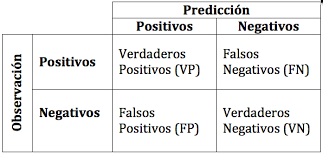

 - Reporte: Nos muestra varios valores los cuales evalúan nuestro clasificador comparando los datos de tipo test y los datos predichos por el modelo. Más concretamente nos muestra; precisión, nos devuelve la probabilidad de acierto, dividiendo las etiquetas acertadas entre el total de etiquetas; sensibilidad (recall), muestra la proporción de verdaderos positivos bien clasificados entre el total de verdaderos positivos; F1, proporciona una media de la precisión y el recall (aquí nos vamos a fijar para saber si es un buen modelo o no)

In [ ]:
# Vemos la precisión de nuestro clasificador con los datos de test
pred = clasificador.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

### Predicción/clasificación de nuevos participantes

In [ ]:
# Clasificar nuevos individuos a través de nuestro clasificador
print(clasificador.predict(bruno_hortelano))
print(clasificador.predict(carolina_marin))

['None']
['None']


# Conclusión